## 1. 데이터 확인


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

from numpy.linalg import norm
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [ ]:
data = keras.datasets.imdb
(train_data, train_label),  (test_data, test_label) = data.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_data[:3], train_label[:3]

(array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
        list([1, 194, 1153, 194, 8255, 78, 22

In [ ]:
print(f"훈련 샘플 수: {len(train_data)}, 레이블 수: {len(train_label)}")

훈련 샘플 수: 25000, 레이블 수: 25000


In [ ]:
len(train_data[0]), len(train_data[0])

(218, 218)

## 2. 데이터 전처리

In [ ]:
word_index = data.get_word_index()
word_index["the"], word_index["and"], word_index["a"], word_index["of"], word_index["to"]

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(1, 2, 3, 4, 5)

In [ ]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [ ]:
len(train_data[0])

218

## 3. 데이터 변환


In [ ]:
train_data = keras.utils.pad_sequences(train_data, value=word_index["<PAD>"],padding='post')

test_data = keras.utils.pad_sequences(test_data, value=word_index["<PAD>"],padding='post')

In [ ]:
train_data[0]

array([ 1, 14, 22, ...,  0,  0,  0], dtype=int32)

In [ ]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [ ]:
len(train_data[0])

2494

## 4. 훈련에 사용할 모형 생성 - 1

In [ ]:
vocab_size = 10000

model_1 = keras.Sequential()
model_1.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=16, input_shape=(None,)))
model_1.add(keras.layers.GlobalAveragePooling1D())
model_1.add(keras.layers.Dense(16, activation='relu'))
model_1.add(keras.layers.Dense(1, activation='sigmoid'))

model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 16)       │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,289 (626.13 KB)

 Trainable params: 160,289 (626.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_label[:10000]
partial_y_train = train_label[10000:]

In [ ]:
model_1_history = model_1.fit(partial_x_train, partial_y_train, epochs=70, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Epoch 1/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.5006 - loss: 0.6944 - val_accuracy: 0.5021 - val_loss: 0.6928
Epoch 2/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5068 - loss: 0.6934 - val_accuracy: 0.5053 - val_loss: 0.6923
Epoch 3/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5130 - loss: 0.6921 - val_accuracy: 0.5053 - val_loss: 0.6929
Epoch 4/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5182 - loss: 0.6918 - val_accuracy: 0.4977 - val_loss: 0.6942
Epoch 5/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5258 - loss: 0.6907 - val_accuracy: 0.5082 - val_loss: 0.6917
Epoch 6/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5288 - loss: 0.6906 - val_accuracy: 0.4975 - val_loss: 0.6970
Epoch 7/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5115 - loss: 0.6918 - val_accuracy: 0.5531 - val_loss: 0.6888
Epoch 8/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5719 - loss: 0.6881 - val_accuracy: 0.5155 - v

In [ ]:
model_1_results = model_1.evaluate(test_data,  test_label, verbose=2)

print(model_1_results)

782/782 - 2s - 3ms/step - accuracy: 0.8324 - loss: 0.4225
[0.42247405648231506, 0.8324000239372253]


In [ ]:
model_1_history_dict = model_1_history.history
model_1_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## 5. 훈련에 사용할 모형 생성 -2

In [ ]:
vocab_size = 10000

model_2 = keras.Sequential()
model_2.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=16, input_shape=(None,), mask_zero=True))
model_2.add(keras.layers.LSTM(32))
model_2.add(keras.layers.Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, None, 16)       │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,305 (649.63 KB)

 Trainable params: 166,305 (649.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_label[:10000]
partial_y_train = train_label[10000:]

In [ ]:
model_2_history = model_2.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.5373 - loss: 0.6908 - val_accuracy: 0.7339 - val_loss: 0.6564
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7574 - loss: 0.5695 - val_accuracy: 0.8263 - val_loss: 0.4377
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.8596 - loss: 0.3725 - val_accuracy: 0.8608 - val_loss: 0.3477
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9000 - loss: 0.2787 - val_accuracy: 0.8745 - val_loss: 0.3085
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9198 - loss: 0.2286 - val_accuracy: 0.8874 - val_loss: 0.2851
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9423 - loss: 0.1733 - val_accuracy: 0.8857 - val_loss: 0.2894
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9600 - loss: 0.1377 - val_accuracy: 0.8681 - val_loss: 0.3140
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9561 - loss: 0.1403 - val_accuracy: 0.8762 - 

In [ ]:
model_2_results = model_2.evaluate(test_data,  test_label, verbose=2)

print(model_2_results)

782/782 - 10s - 13ms/step - accuracy: 0.8524 - loss: 0.3950
[0.39499953389167786, 0.8524399995803833]


In [ ]:
model_2_history_dict = model_2_history.history
model_2_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## 6. 모형 성능 비교

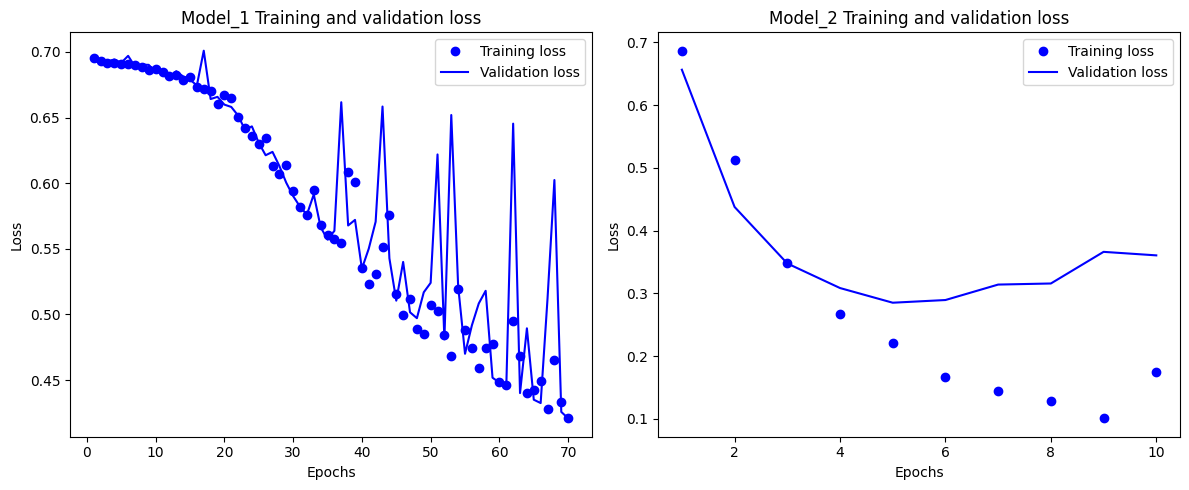

In [ ]:
history_dicts = {
    1: model_1_history_dict,
    2: model_2_history_dict
}

plt.figure(figsize=(12,5))

for i in range(1,3):
  plt.subplot(1,2,i)
  acc = history_dicts[i]['accuracy']
  val_acc = history_dicts[i]['val_accuracy']
  loss = history_dicts[i]['loss']
  val_loss = history_dicts[i]['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title(f'Model_{i} Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

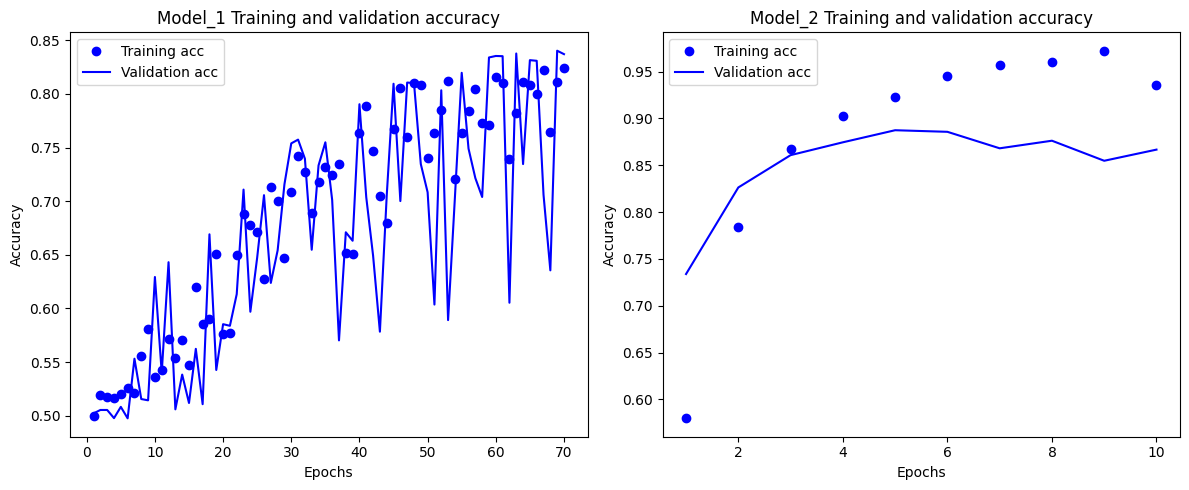

In [ ]:
plt.clf()   # 그림 초기화

history_dicts = {
    1: model_1_history_dict,
    2: model_2_history_dict
}

plt.figure(figsize=(12,5))

for i in range(1,3):
  plt.subplot(1,2,i)
  acc = history_dicts[i]['accuracy']
  val_acc = history_dicts[i]['val_accuracy']
  loss = history_dicts[i]['loss']
  val_loss = history_dicts[i]['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title(f'Model_{i} Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

plt.tight_layout()
plt.show()

## 7. Embedding 분석 및 유사도 확인


In [ ]:
embedding_layer = model_2.layers[0]
embedding_weights = embedding_layer.get_weights()[0]
print(embedding_weights.shape)  # (vocab_size, embedding_dim)


(10000, 16)


In [ ]:
word_index = data.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

In [ ]:

positive_words = ['good', 'great', 'wonderful', 'fun', 'excellent', 'amazing', 'awesome', 'fantastic', 'perfect']

negative_words = ['bad', 'terrible', 'boring', 'awful', 'disappointing', 'poor','unpleasant', 'worst', 'stupid']

words = positive_words + negative_words

word_embeddings = []
for w in words:
    idx = word_index.get(w)
    if idx is not None:
        idx += 3
        word_embeddings.append(embedding_weights[idx])
    else:
        word_embeddings.append(np.zeros(embedding_weights.shape[1]))  # vocab에 없으면 0 벡터

word_embeddings = np.array(word_embeddings)


In [ ]:

# 특정 단어 코사인 유사도 계산

target_words = ['good', 'great', 'fun', 'perfect', 'bad', 'terrible', 'poor','worst']

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

# target_words가 words 리스트에 다 있는지 확인 및 인덱스 수집
valid_words = []
indices = []
for w in target_words:
    if w in words:
        valid_words.append(w)
        indices.append(words.index(w))
    else:
        print(f"단어 '{w}'가 단어 리스트에 없습니다.")

# 선택한 단어들의 임베딩 벡터만 추출
selected_embeddings = word_embeddings[indices]

# similarity matrix 계산 (7x7)
n = len(selected_embeddings)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        similarity_matrix[i, j] = cosine_similarity(selected_embeddings[i], selected_embeddings[j])


similarity_df = pd.DataFrame(similarity_matrix, index=valid_words, columns=valid_words)

similarity_df


,good,great,fun,perfect,bad,terrible,poor,worst
good,1.000000,0.502545,0.045266,-0.177719,0.295946,-0.037076,0.331433,0.045712
great,0.502545,1.000000,-0.412940,-0.394875,0.328076,-0.147759,0.435573,0.004436
fun,0.045266,-0.412940,1.000000,-0.141527,0.362294,0.176482,-0.038036,0.059278
perfect,-0.177719,-0.394875,-0.141527,1.000000,-0.406313,0.093138,-0.336317,0.236585
bad,0.295946,0.328076,0.362294,-0.406313,1.000000,-0.067346,0.092570,-0.096111
terrible,-0.037076,-0.147759,0.176482,0.093138,-0.067346,1.000000,-0.192277,0.025243
poor,0.331433,0.435573,-0.038036,-0.336317,0.092570,-0.192277,1.000000,0.080910
worst,0.045712,0.004436,0.059278,0.236585,-0.096111,0.025243,0.080910,1.000000


In [ ]:
# 전체 코사인 유사도 계산

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

# similarity matrix 계산
n = len(word_embeddings)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        similarity_matrix[i, j] = cosine_similarity(word_embeddings[i], word_embeddings[j])


similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)

similarity_df


,good,great,wonderful,fun,excellent,amazing,awesome,fantastic,perfect,bad,terrible,boring,awful,disappointing,poor,unpleasant,worst,stupid
good,1.000000,0.502545,-0.314513,0.045266,0.065670,-0.073286,-0.297610,0.322492,-0.177719,0.295946,-0.037076,-0.049540,-0.315036,0.305417,0.331433,0.237629,0.045712,0.097284
great,0.502545,1.000000,-0.109057,-0.412940,0.200537,-0.313153,-0.226049,0.445902,-0.394875,0.328076,-0.147759,0.160768,-0.087374,0.405842,0.435573,-0.081999,0.004436,0.418522
wonderful,-0.314513,-0.109057,1.000000,-0.268452,-0.288977,-0.326907,0.144227,-0.014829,0.375590,-0.135338,0.028086,0.036745,0.127149,0.159101,-0.399274,-0.053563,-0.086684,-0.026205
fun,0.045266,-0.412940,-0.268452,1.000000,0.039327,0.024167,-0.439118,-0.472813,-0.141527,0.362294,0.176482,-0.115510,-0.081041,-0.125322,-0.038036,-0.010033,0.059278,-0.186219
excellent,0.065670,0.200537,-0.288977,0.039327,1.000000,0.090793,-0.283136,-0.036182,-0.460674,0.275328,0.166074,-0.160581,-0.135395,0.212888,0.024175,-0.503875,-0.257433,0.126265
amazing,-0.073286,-0.313153,-0.326907,0.024167,0.090793,1.000000,-0.127975,0.062098,0.167752,0.089831,-0.071350,-0.124576,-0.417390,-0.340931,-0.173999,0.315773,0.367725,0.257510
awesome,-0.297610,-0.226049,0.144227,-0.439118,-0.283136,-0.127975,1.000000,-0.194724,0.095707,-0.645820,-0.155481,-0.052815,0.239002,0.047887,0.101802,-0.093181,0.144209,-0.411726
fantastic,0.322492,0.445902,-0.014829,-0.472813,-0.036182,0.062098,-0.194724,1.000000,0.078134,0.310274,-0.181302,-0.028218,-0.201715,0.055753,-0.038650,0.084280,-0.120844,0.434739
perfect,-0.177719,-0.394875,0.375590,-0.141527,-0.460674,0.167752,0.095707,0.078134,1.000000,-0.406313,0.093138,0.039980,0.395422,-0.153953,-0.336317,0.484163,0.236585,0.030277
bad,0.295946,0.328076,-0.135338,0.362294,0.275328,0.089831,-0.645820,0.310274,-0.406313,1.000000,-0.067346,-0.247683,-0.318097,-0.146675,0.092570,-0.055749,-0.096111,0.388762


## 7. 긍정 / 부정 시각화


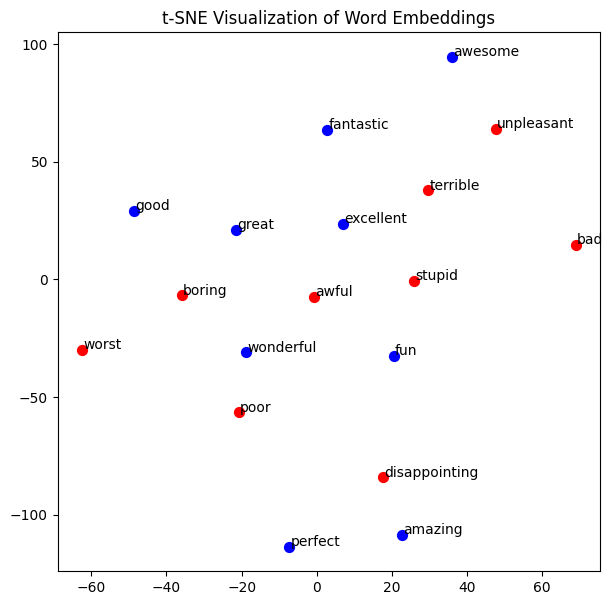

In [ ]:
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
emb_2d = tsne.fit_transform(word_embeddings)

plt.figure(figsize=(7, 7))

for i, word in enumerate(words):
    x, y = emb_2d[i]
    color = 'blue' if word in positive_words else 'red'  # 감성별 색 구분
    plt.scatter(x, y, c=color, s=50)
    plt.text(x+0.3, y+0.3, word, fontsize=10)

plt.title("t-SNE Visualization of Word Embeddings")
plt.show()


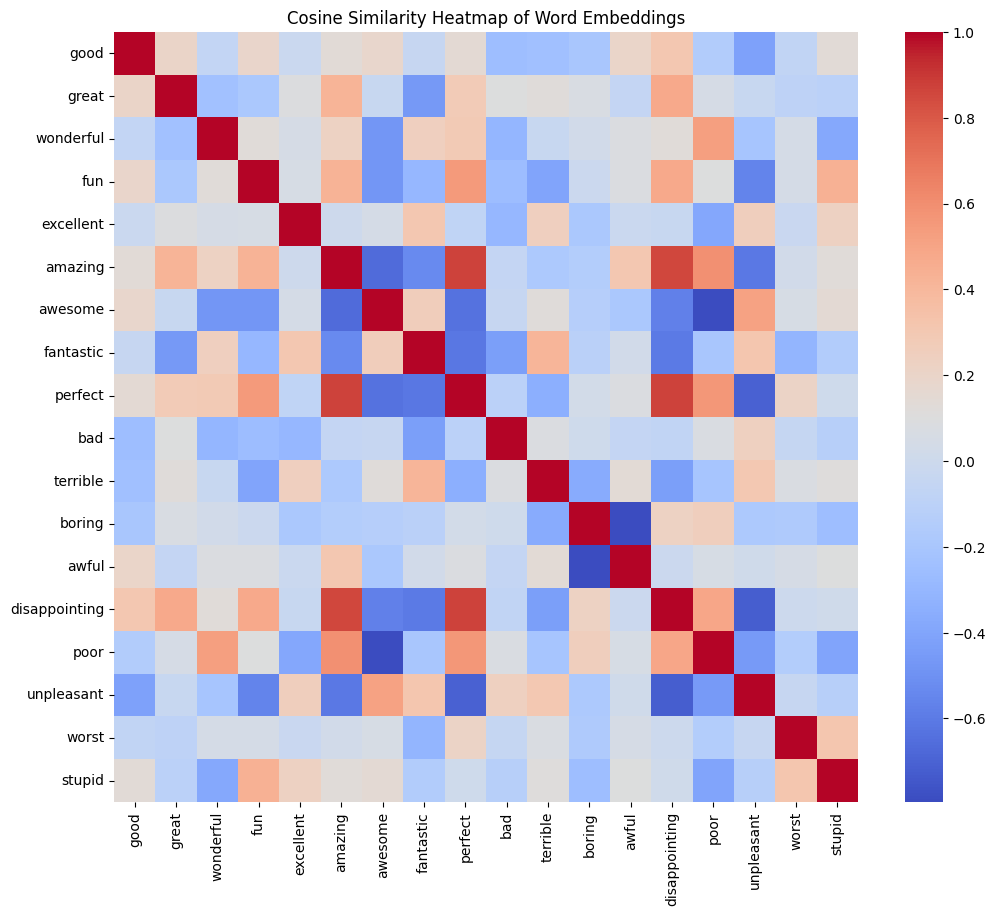

In [ ]:
# 단어 간 유사도 행렬 계산
similarity_matrix = cosine_similarity(word_embeddings)

plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, xticklabels=words, yticklabels=words,cmap="coolwarm", annot=False)

plt.title("Cosine Similarity Heatmap of Word Embeddings")
plt.show()
